# Project: Investigate a Dataset - No-Show Appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information on 100,000 medical appointments collected across Brazil. Basic details about each patient as well as appointment and scheduled days are represented. The data set uses binary encoding (0 and 1) to show whether a patient falls in a particular category (0 meaning not applicable and 1 confirming that they belong in that category). The 'Neighbourhood' represents the neighbourhood where the hospital is located. For further clarity, the scheduled day refers to the day when the patient booked their appointment at the hospital while the appointment day is the actual day when the patient is expected to show up for their session. Some patients are enrolled in the Brasilian welfare program and that is what the 'Scholarship' column depicts. The last column ('No-show') is quite tricky because a label of 'No' means that the patient wasn't absent and made their appointment while 'Yes' means that they didn't make the appointment. 


### Question(s) for Analysis
> - What factors influence whether or not a patient shows up for their appointment ?
> - Are certain conditions specific to some age groups than others ?
> - What are the characteristics of individuals who show up to their appointment in contrast to those who do not ?

In [51]:
# importing the necessary libraries 
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [53]:
#Loading the data and inspecting the first five rows and the last five rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [55]:
#Returns the number of rows and columns in the form (number of rows, number of columns)
df.shape

(110527, 14)

In [56]:
# checking for number of entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [57]:
# check for duplicates
df.duplicated().sum()

0

In [58]:
# inspect statistical features of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### The dataset has a total of 110,527 rows and 14 columns, of which 8 are integer types, 5 are string types and 1 is a float. For the sake of readability and ease of recall, I will be converting the column headers to lowercase, renaming some columns in the data cleaning step and replacing characters where applicable. 
#### Also, a closer look at the description of the Age column reveals the presence of an outlier. The minimum age as can be seen is -1 which is quite abnormal. The next step will be to query that row to address the issue which might mean dropping it in the data cleaning step so it doesn't affect analysis.
#### We also see that the appointmentid and patientid columns are in numeric form which is wrong as they are unique identifiers and will not be used in computing any values. Therefore, they will be converted to string types in the data cleaning step.
#### The appointmentday and scheduledday columns need to also be in datetime format so that the can be computed with if there's need.


### Data Cleaning
 

#### Converting the column headers to lowercase, renaming the two affected columns and replacing characters:

In [59]:

df.rename(columns=lambda x: x.lower().replace("-","_"), inplace=True)


df.rename(columns={'hipertension':'hypertension','handcap':'handicap'},inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Converting the scheduled day and appointment day column to datetime format for ease of computing the number of days apart:

In [60]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'], format="%Y-%m-%d %H:%M:%S.%f")
df['appointmentday'] = pd.to_datetime(df['appointmentday'], format="%Y-%m-%d %H:%M:%S.%f")

#### Converting the appointment id and patient id column to strings as they are unique identifiers not numerical entities:

In [61]:
df.appointmentid = df.appointmentid.astype(str)
df.patientid = df.patientid.astype(str)

### Removing the from the age column:

In [62]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### return all the features for the row where age is minimum (-1)

In [63]:
df.query('age==age.min()')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.65943158731e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


#### assign the index of the affected row to a variable for ease of dropping

In [64]:
i = df.query('age==age.min()').index

#### drop the affected row

In [65]:
df.drop(i,inplace=True)

#### check the description again to be sure its now normal

In [66]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### Having dropped the row containing the outlier, the total number of entries is our dataset is reduced to 110,526 as can be seen below:

In [67]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Inspecting the data types to check for conformity

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110526 non-null object
appointmentid     110526 non-null object
gender            110526 non-null object
scheduledday      110526 non-null datetime64[ns]
appointmentday    110526 non-null datetime64[ns]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hypertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handicap          110526 non-null int64
sms_received      110526 non-null int64
no_show           110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 12.6+ MB


#### The minimum age is now 0 which might represent an infant. Its safe to assume that the age distribution is now normal.
#### For the sake of categorization to answer the second question, the age column is organized into buckets in the following cells:
> create a new column for age group using pd.cut() and the minimum to maximum values of age.

In [69]:
df['age_group'] = pd.cut(df['age'],bins=[0,18,37,55,115], labels = ['young','middle-aged','old adults','elderly'])

#### check the new dataframe

In [70]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,elderly
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,elderly
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,elderly
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,young
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,elderly


#### creating a new column 'time_apart' as the difference between the scheduled day and the appointment day

In [71]:
df['time_apart'] = df['appointmentday'] - df['scheduledday'] 

#### checking the final dataframe

In [72]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,time_apart
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,elderly,-1 days +05:21:52
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,elderly,-1 days +07:51:33
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,elderly,-1 days +07:40:56
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,young,-1 days +06:30:29
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,elderly,-1 days +07:52:37


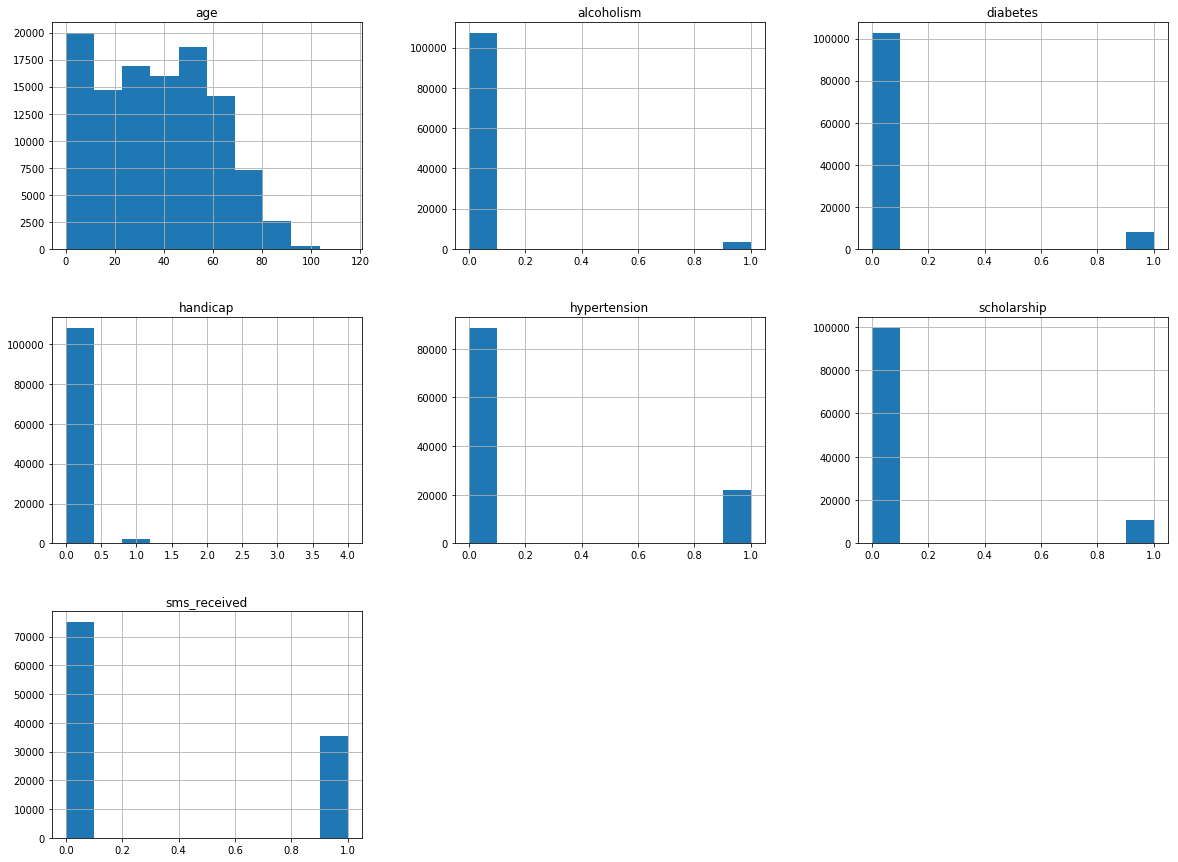

In [73]:
df.hist(figsize=(20,15));

#### The histogram distribution shows that there are generally more people with none of the highlighted medical conditions than those who have. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What factors influence whether or not a patient shows up for their appointment ?)

#### First plot the overall distribution of the data for context
> - Recall that 'Yes' for no_show refers to those who missed their appointments

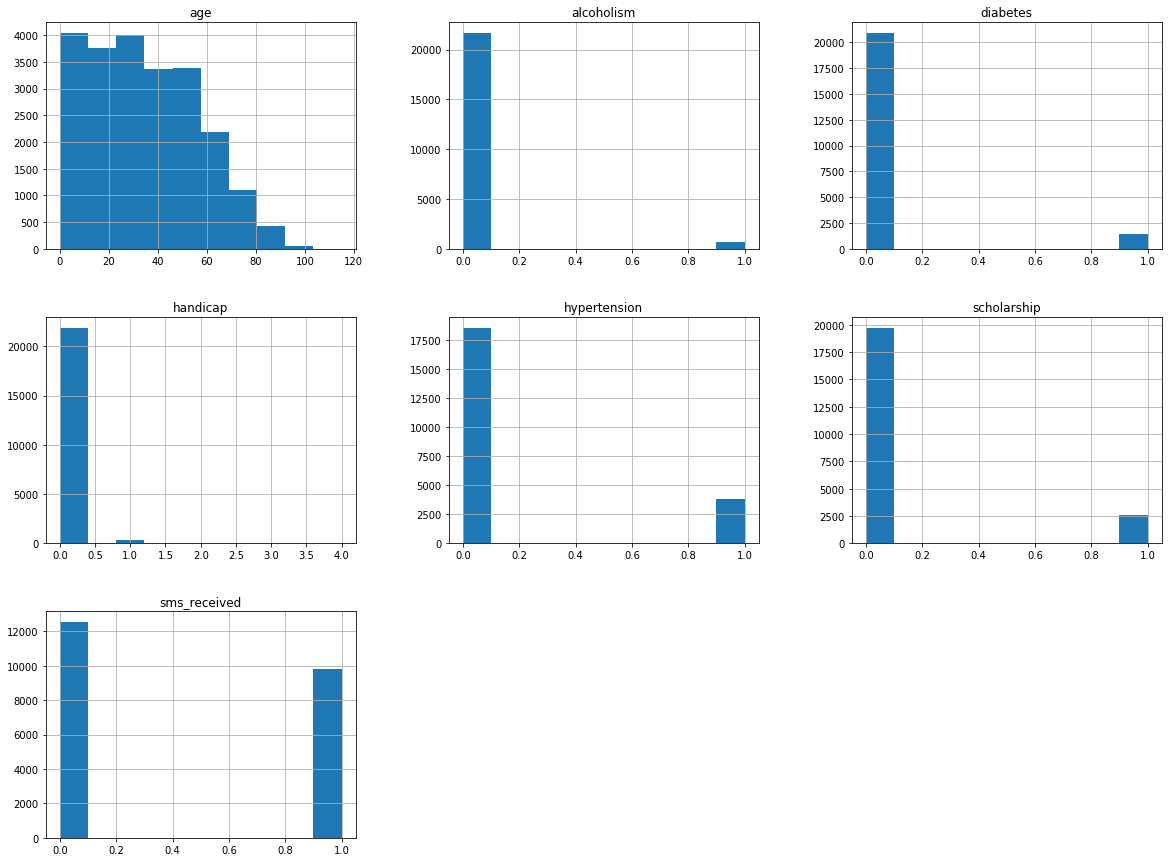

In [74]:
df.query('no_show=="Yes"').hist(figsize=(20,15));

#### Seeing that most of the people who missed their appointments do not have any of the highlighted medical conditions, we could almost infer that this is the reason why they didn't show up but then in the full dataset, more people generally aren't dealing with any of the health conditions either so an inference can't be made based on this.

In [75]:
# Establish a distinct count of those who made their appointment and those who did not.
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

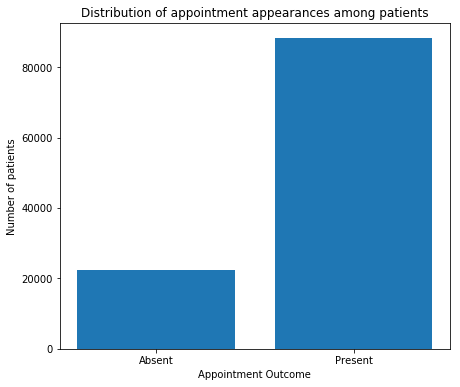

In [28]:
#Plot the distribution of appointment outcomes
plt.figure(figsize=(7,6))
plt.bar(['Present','Absent'],[88207,22319])
plt.title('Distribution of appointment appearances among patients')
plt.xlabel('Appointment Outcome')
plt.ylabel('Number of patients');


#### From the bar plot above, more people made their appointments than missed it. The investigation begins with further splitting the appointment outcomes by gender.

In [29]:
# the distinct number of males and females who missed their appointment
df.query('no_show=="Yes"').gender.value_counts()

F    14594
M     7725
Name: gender, dtype: int64

In [30]:
#  the distinct number of males and females who didn't miss their appointment
df.query('no_show=="No"').gender.value_counts()

F    57245
M    30962
Name: gender, dtype: int64

#### visualizing the results of the two preceding cells for contrast

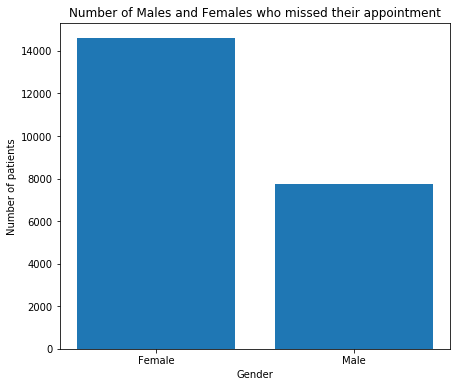

In [31]:
plt.figure(figsize=(7,6))
plt.bar(['Female','Male'],[14594,7725])
plt.title('Number of Males and Females who missed their appointment')
plt.xlabel('Gender')
plt.ylabel('Number of patients');


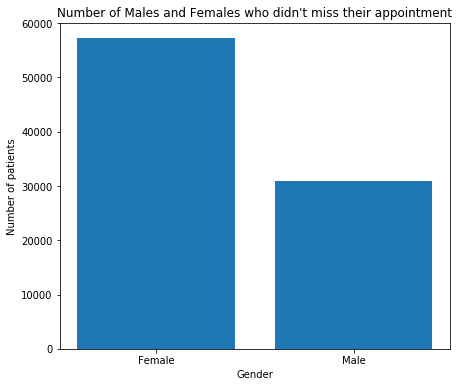

In [32]:
plt.figure(figsize=(7,6))
plt.bar(['Female','Male'],[57245,30962])
plt.title("Number of Males and Females who didn't miss their appointment")
plt.xlabel('Gender')
plt.ylabel('Number of patients');

#### Although more females missed their appointments than males, there are also more females who made their appointments than males. This shows that most of the patients in the dataset are female. Therefore, it is too early to draw any conclusions based on gender. The plot below shows this bias:

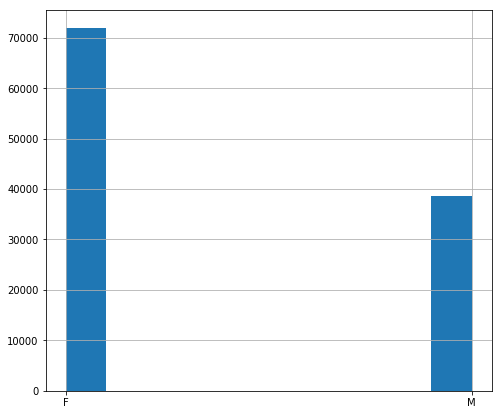

In [33]:
df.gender.hist(figsize=(8,7));

#### Exploring appointment outcomes by age group
> - Young
> - Middle-aged
> - Old Adults
> - Elderly

In [34]:
df.groupby('age_group').no_show.value_counts()

age_group    no_show
young        No         19619
             Yes         5708
middle-aged  No         20836
             Yes         6414
old adults   No         21651
             Yes         5255
elderly      No         23201
             Yes         4303
Name: no_show, dtype: int64

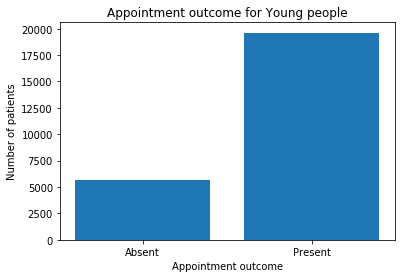

In [35]:
plt.bar(['Present','Absent'],[19619,5708])
plt.title('Appointment outcome for Young people')
plt.xlabel('Appointment outcome')
plt.ylabel('Number of patients');

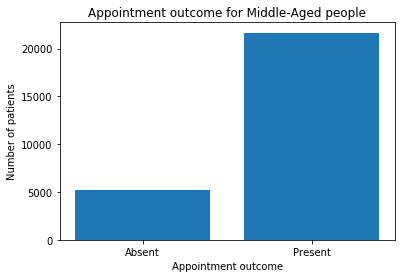

In [36]:
plt.bar(['Present','Absent'],[21651,5255])
plt.title('Appointment outcome for Middle-Aged people')
plt.xlabel('Appointment outcome')
plt.ylabel('Number of patients');

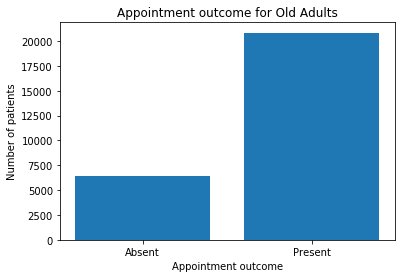

In [37]:
plt.bar(['Present','Absent'],[20836,6414])
plt.title('Appointment outcome for Old Adults')
plt.xlabel('Appointment outcome')
plt.ylabel('Number of patients');

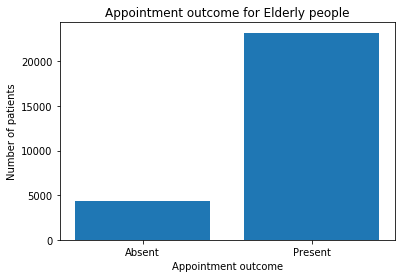

In [38]:
plt.bar(['Present','Absent'],[23201,4303])
plt.title('Appointment outcome for Elderly people')
plt.xlabel('Appointment outcome')
plt.ylabel('Number of patients');

#### Majority of the absentees are middle-aged people while the majority of those who actually showed up are elderly people.


*Recall that each health condition uses binary classification to depict truth value (0=No, 1=Yes)*
#### Next, we explore appointment outcomes by health challenge.
> - hypertension
> - diabetes
> - handicap
> - alcoholism

In [39]:
df.query('hypertension==1').no_show.value_counts()

No     18029
Yes     3772
Name: no_show, dtype: int64

In [40]:
df.query('diabetes==1').no_show.value_counts()

No     6513
Yes    1430
Name: no_show, dtype: int64

In [41]:
df.query('handicap==1').no_show.value_counts()

No     1676
Yes     366
Name: no_show, dtype: int64

In [42]:
df.query('alcoholism==1').no_show.value_counts()

No     2683
Yes     677
Name: no_show, dtype: int64

#### Most of the absentees are hypertensive just as most of the people who showed up are hypertensive as well. Again, we see a bias where there are more hypertensive patients than the other ailment classes in the dataset which is quite similar to what we saw for the gender distribution.


#### Based on the nature of the data and seeing as the other variables are biased toward a particular class, the only tangible inference would be that middle-aged people tend to miss their appointments more than the other age groups. Age could therefore be a key factor that determines whether a patient shows up to their appointment or not.

### Research Question 2  (Are certain conditions specific to some age groups than others ?)

#### Exploring the occurence of each condition per age group
> - alcoholism
> - diabetes
> - hypertension
> - handicap

In [43]:
df.query('alcoholism==1').age_group.value_counts()

old adults     1676
elderly        1100
middle-aged     556
young            28
Name: age_group, dtype: int64

In [44]:
df.query('diabetes==1').age_group.value_counts()

elderly        5543
old adults     2017
middle-aged     332
young            51
Name: age_group, dtype: int64

In [45]:
df.query('hypertension==1').age_group.value_counts()

elderly        14151
old adults      6435
middle-aged     1175
young             40
Name: age_group, dtype: int64

In [46]:
df.query('handicap==1').age_group.value_counts()

elderly        926
old adults     533
middle-aged    363
young          219
Name: age_group, dtype: int64

#### Elderly people tend to be more hypertensive and diabetic. Old Adults struggle more with alcoholism, and young people tend to deal less with these conditions. Based on the above cells and the data, one could say that these conditions are common among some age groups than the others

### Research Question 3  (What are the characteristics of individuals who show up to their appointments in contrast to those who do not ?)

#### Querying the dataframe distinctively based on the values of 'no_show' as either Yes or No

In [48]:
df.query('no_show=="No"').describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,time_apart
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207
mean,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,8 days 06:56:54.710306
std,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381,14 days 12:57:16.469157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +03:15:06
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +14:58:59.500000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1 days 14:56:46
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11 days 15:25:57
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:17:18


In [49]:
df.query('no_show=="Yes"').describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,time_apart
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,15 days 08:17:34.998879
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,16 days 14:24:19.715831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 10:47:25
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10 days 07:42:31
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22 days 15:44:33
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01


#### The main difference between these two groups of people would be the number of days between the date they scheduled and the actual date of the appointment. From the charts above, people who show up to their appointments are typically around 8days away from their appointment date on average while those who eventually don't show up are about 15days away from their appointment dates on average.

#### 75% of those who do not make their appointments have twice the number of days between the schedule date and the appointment date.

#### A safe assumption would be that the closer the date of schedule is to the appointment date, the higher the likelihood of showing up to the appointment.


<a id='conclusions'></a>
## Conclusions


## Submitting your Project 


#### In summary:
> - Middle-Aged people tend to miss their appointments more than the other age groups 
> - Some age groups experience more cases of a particular health condition than other age groups
> - The closer the gap between the date of booking and the appointment date, the higher the likelihood fo making the appointment.

#### However, it would have been helpful to also explore the proximity of patients to the target hospital as a factor that influences appointment outcome as people generally feel reluctant to commuting long distances for healthcare reasons except it can't be handled nearby but no such feature was available. Also, the data was largely biased toward the female gender making it difficult to draw any conclusions using the gender distribution. 

#### The binary encoding used on the medical conditions part of the data poses a limitation in that one isn't able to easily deduce how much of people who do not have one condition, are dealing with another condition or plot the distribution of these health conditions across the number of patients available at once. This would have made it a bit more straightforward providing answers to the second question.

#### The links to the code snippet for datetime conversion as used in this notebook can be found [here](https://datatofish.com/strings-to-datetime-pandas/) and [here](https://stackoverflow.com/questions/31929538/how-to-subtract-datetimes-timestamps-in-python)

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])